In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# instruction to the notebook stating warning should nit be displays
import warnings
warnings.filterwarnings('ignore')

In [35]:
from google.colab import files
adfile = files.upload()

Saving boston.csv to boston (1).csv


In [36]:
df= pd.read_csv('boston.csv')
df.head()
del df['Unnamed: 0']

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30), squeeze=False)

# List of all the columns
columns = df.columns.to_list()

# Removing the Target Variable
columns.pop()

axes = axes.flatten()

for i, column in enumerate(columns):
    sns.scatterplot(df[column],df['medv'],ax=axes[i], s=50)
    axes[i].set_xlabel(column, fontsize = 20)
    axes[i].set_ylabel('Price', fontsize = 20)

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

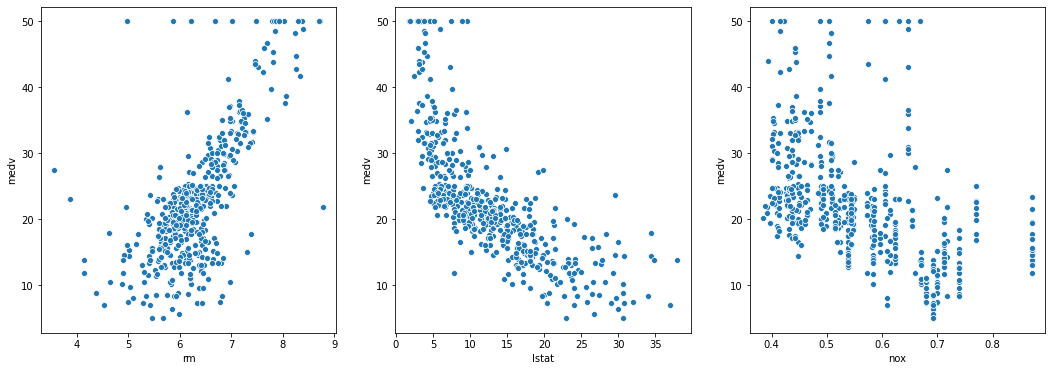

In [38]:
fig , axes= plt.subplots(1,3, figsize=(18,6))
sns.scatterplot(df['rm'],df['medv'], ax= axes[0])
sns.scatterplot(df['lstat'],df['medv'], ax= axes[1])
sns.scatterplot(df['nox'],df['medv'], ax= axes[2])
plt.show()

In [39]:
# We can see that the Feature RM has a Positive Linear RelationShip with the MEDV Column, i.e as the number of Rooms increase the Price Tends to Increase.
# We can also observe a Negative Linear RelationShip between LSTAT and MEDV feature, i.e as the LSTAT(Lower Status Population) increases the Prices tend to decrease.

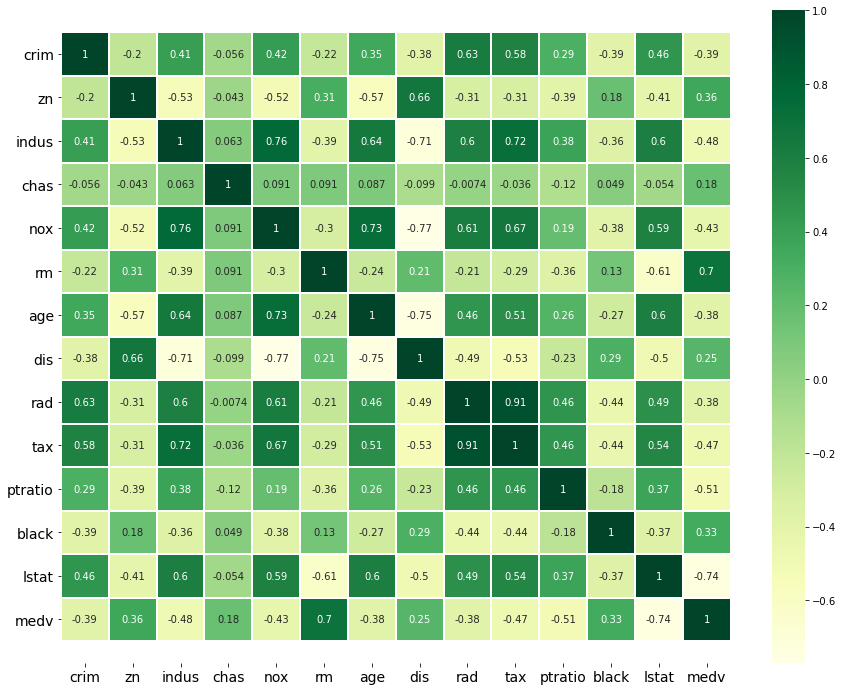

In [40]:
plt.figure(figsize=(15, 12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(df.corr(),annot=True,linewidths=1, cmap='YlGn')

# To prevent cutting of the heatmap
plt.ylim(plt.gca().get_ylim()[0] + 0.5, plt.gca().get_ylim()[1] - 0.5);
#BY looking at the correlation matrix we can seen that RM has as strong positive correlation with medv(0.7) where as LSTAT has high neg correlation with(-0.74)

In [41]:
x = df.drop('medv', axis=1)
# storing all the features in x variable
y = df['medv']
# storing target in y variable
# Splitting the Data into Training & Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)

Applying Linear Regression Model to the dataset and predicting the prices.

In [42]:
# Fitting Multi Linear regression model to training model 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train) 
# predicting the test set results 
y_pred = regressor.predict(x_test) 

Plotting Scatter graph to show the prediction results – ‘ytrue’ value vs ‘y_pred’ value

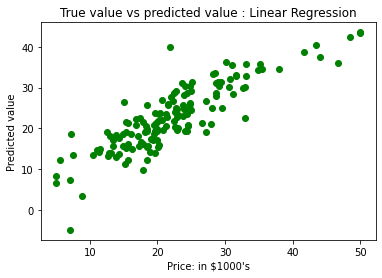

In [43]:
# Plotting Scatter graph to show the prediction  
# results - 'ytrue' value vs 'y_pred' value 
plt.scatter(y_test, y_pred, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show()

Results of Linear Regression i.e. Mean Squred Error n R2 square score

In [44]:
# evaluation matrics
from sklearn.metrics import mean_squared_error, r2_score
print("MSE = {}\nR2={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test, y_pred)))

MSE = 19.105814913034152
R2=0.7353153846879095


In [45]:
# residuals
residuals = y_test - y_pred
rss = (residuals ** 2).sum()

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.3480540276932627
RMSE: 4.3710198939188265


Text(0, 0.5, 'Predicted House Price')

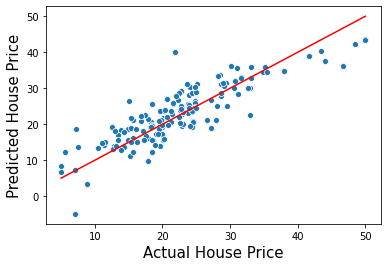

In [47]:
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(y_test, y_test,  color='red') 
plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Predicted House Price', fontsize = 15)

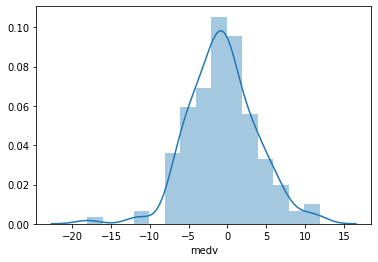

In [48]:
sns.distplot(residuals)
plt.show()

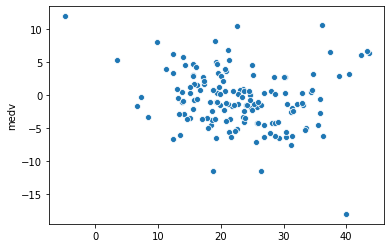

In [49]:
sns.scatterplot(y_pred,residuals)
plt.show()

In [50]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)
x_poly = pf.fit_transform(x)
x_poly
x_train, x_test, y_train , y_test = train_test_split(x_poly,y,test_size=0.3)

MSE = 9.73183884942848
R2=0.8654589592269614


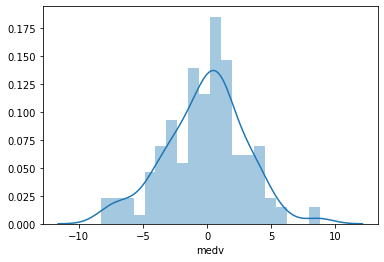

In [51]:
regressor= LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
print("MSE = {}\nR2={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test, y_pred)))
residuals = y_test- y_pred
sns.distplot(residuals,bins=20)
plt.show()

MSE = 16.478681692284162
R2=0.7835076697229061


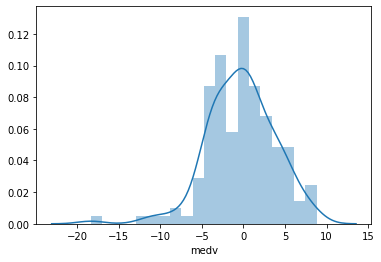

In [52]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)
x_poly = pf.fit_transform(x)
x_poly
x_train, x_test, y_train , y_test = train_test_split(x_poly,y,test_size=0.3)
regressor= LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
print("MSE = {}\nR2={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test, y_pred)))
residuals = y_test- y_pred
sns.distplot(residuals,bins=20)
plt.show()